<a href="https://colab.research.google.com/github/scharu07/Capstone-Project---Credit-Card-Default-Prediction-/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## <b><u>Importing</b></u>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,auc,f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

!pip install xlrd==1.2.0
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Alma Better/Capstone Projects/Supervised Learning - Classification/default of credit card clients.xls'
dataset=pd.read_excel(path)

## <u><b>Data Inspection</b></u>

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
len(dataset)

30001

In [7]:
dataset.shape

(30001, 25)

In [8]:
dataset.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


### Removing Duplicates If any

In [9]:
df=dataset.copy()

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.shape

(30001, 25)

There were no duplicates in the dataset

### Renaming the Variables to Meaningful Names

In [12]:
df.rename(columns={'X1':'CreditLimit','X2':'Gender','X3':'Education','X4':'Marital_Status','X5':'Age','X6':'RepaymentStatus_Sept'
,'X7':'RepaymentStatus_Aug','X8':'RepaymentStatus_July','X9':'RepaymentStatus_June','X10':'RepaymentStatus_May',
'X11':'RepaymentStatus_April','X12':'LatestBill_Amount_Sept','X13':'LatestBill_Amount_Aug','X14':'LatestBill_Amount_July',
'X15':'LatestBill_Amount_June','X16':'LatestBill_Amount_May','X17':'LatestBill_Amount_April','X18':'PrevBill_Amount_Sept',
'X19':'PrevBill_Amount_Aug','X20':'PrevBill_Amount_July','X21':'PrevBill_Amount_June','X22':'PrevBill_Amount_May',
'X23':'PrevBill_Amount_April','Y':'Y_DefaultPayment'},inplace=True)

In [13]:
df.head()

,Unnamed: 0,CreditLimit,Gender,Education,Marital_Status,Age,RepaymentStatus_Sept,RepaymentStatus_Aug,RepaymentStatus_July,RepaymentStatus_June,RepaymentStatus_May,RepaymentStatus_April,LatestBill_Amount_Sept,LatestBill_Amount_Aug,LatestBill_Amount_July,LatestBill_Amount_June,LatestBill_Amount_May,LatestBill_Amount_April,PrevBill_Amount_Sept,PrevBill_Amount_Aug,PrevBill_Amount_July,PrevBill_Amount_June,PrevBill_Amount_May,PrevBill_Amount_April,Y_DefaultPayment
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dropping off Irrelevant Rows and Columns

In [14]:
df.columns

Index(['Unnamed: 0', 'CreditLimit', 'Gender', 'Education', 'Marital_Status',
       'Age', 'RepaymentStatus_Sept', 'RepaymentStatus_Aug',
       'RepaymentStatus_July', 'RepaymentStatus_June', 'RepaymentStatus_May',
       'RepaymentStatus_April', 'LatestBill_Amount_Sept',
       'LatestBill_Amount_Aug', 'LatestBill_Amount_July',
       'LatestBill_Amount_June', 'LatestBill_Amount_May',
       'LatestBill_Amount_April', 'PrevBill_Amount_Sept',
       'PrevBill_Amount_Aug', 'PrevBill_Amount_July', 'PrevBill_Amount_June',
       'PrevBill_Amount_May', 'PrevBill_Amount_April', 'Y_DefaultPayment'],
      dtype='object')

Column Unnamed: 0 can be dropped as it represents Index only and has no significance

In [15]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [16]:
df.head()

,CreditLimit,Gender,Education,Marital_Status,Age,RepaymentStatus_Sept,RepaymentStatus_Aug,RepaymentStatus_July,RepaymentStatus_June,RepaymentStatus_May,RepaymentStatus_April,LatestBill_Amount_Sept,LatestBill_Amount_Aug,LatestBill_Amount_July,LatestBill_Amount_June,LatestBill_Amount_May,LatestBill_Amount_April,PrevBill_Amount_Sept,PrevBill_Amount_Aug,PrevBill_Amount_July,PrevBill_Amount_June,PrevBill_Amount_May,PrevBill_Amount_April,Y_DefaultPayment
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


First Row can be dropped as it represents the information per column and we have already renamed the columns to meaningful names

In [17]:
df.drop(index=0,axis=0,inplace=True)

In [18]:
df.head()

,CreditLimit,Gender,Education,Marital_Status,Age,RepaymentStatus_Sept,RepaymentStatus_Aug,RepaymentStatus_July,RepaymentStatus_June,RepaymentStatus_May,RepaymentStatus_April,LatestBill_Amount_Sept,LatestBill_Amount_Aug,LatestBill_Amount_July,LatestBill_Amount_June,LatestBill_Amount_May,LatestBill_Amount_April,PrevBill_Amount_Sept,PrevBill_Amount_Aug,PrevBill_Amount_July,PrevBill_Amount_June,PrevBill_Amount_May,PrevBill_Amount_April,Y_DefaultPayment
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CreditLimit              30000 non-null  object
 1   Gender                   30000 non-null  object
 2   Education                30000 non-null  object
 3   Marital_Status           30000 non-null  object
 4   Age                      30000 non-null  object
 5   RepaymentStatus_Sept     30000 non-null  object
 6   RepaymentStatus_Aug      30000 non-null  object
 7   RepaymentStatus_July     30000 non-null  object
 8   RepaymentStatus_June     30000 non-null  object
 9   RepaymentStatus_May      30000 non-null  object
 10  RepaymentStatus_April    30000 non-null  object
 11  LatestBill_Amount_Sept   30000 non-null  object
 12  LatestBill_Amount_Aug    30000 non-null  object
 13  LatestBill_Amount_July   30000 non-null  object
 14  LatestBill_Amount_June   30000 non-nul

In [20]:
df.describe()

,CreditLimit,Gender,Education,Marital_Status,Age,RepaymentStatus_Sept,RepaymentStatus_Aug,RepaymentStatus_July,RepaymentStatus_June,RepaymentStatus_May,RepaymentStatus_April,LatestBill_Amount_Sept,LatestBill_Amount_Aug,LatestBill_Amount_July,LatestBill_Amount_June,LatestBill_Amount_May,LatestBill_Amount_April,PrevBill_Amount_Sept,PrevBill_Amount_Aug,PrevBill_Amount_July,PrevBill_Amount_June,PrevBill_Amount_May,PrevBill_Amount_April,Y_DefaultPayment
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Updating Appropriate Data type of Variables

All the Variables in the dataset are integers but the data type is object.So we can update object data type to Int

In [21]:
for i in df.columns.tolist():
  df[i]=df[i].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   CreditLimit              30000 non-null  int64
 1   Gender                   30000 non-null  int64
 2   Education                30000 non-null  int64
 3   Marital_Status           30000 non-null  int64
 4   Age                      30000 non-null  int64
 5   RepaymentStatus_Sept     30000 non-null  int64
 6   RepaymentStatus_Aug      30000 non-null  int64
 7   RepaymentStatus_July     30000 non-null  int64
 8   RepaymentStatus_June     30000 non-null  int64
 9   RepaymentStatus_May      30000 non-null  int64
 10  RepaymentStatus_April    30000 non-null  int64
 11  LatestBill_Amount_Sept   30000 non-null  int64
 12  LatestBill_Amount_Aug    30000 non-null  int64
 13  LatestBill_Amount_July   30000 non-null  int64
 14  LatestBill_Amount_June   30000 non-null  int64
 15  La

In [23]:
df.describe()

,CreditLimit,Gender,Education,Marital_Status,Age,RepaymentStatus_Sept,RepaymentStatus_Aug,RepaymentStatus_July,RepaymentStatus_June,RepaymentStatus_May,RepaymentStatus_April,LatestBill_Amount_Sept,LatestBill_Amount_Aug,LatestBill_Amount_July,LatestBill_Amount_June,LatestBill_Amount_May,LatestBill_Amount_April,PrevBill_Amount_Sept,PrevBill_Amount_Aug,PrevBill_Amount_July,PrevBill_Amount_June,PrevBill_Amount_May,PrevBill_Amount_April,Y_DefaultPayment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## <b><u>Exploratory Data Analysis</b></u>

In [24]:
discrete_variables=[i for i in df.columns.tolist() if len(df[i].unique())<=20]
discrete_variables

['Gender',
 'Education',
 'Marital_Status',
 'RepaymentStatus_Sept',
 'RepaymentStatus_Aug',
 'RepaymentStatus_July',
 'RepaymentStatus_June',
 'RepaymentStatus_May',
 'RepaymentStatus_April',
 'Y_DefaultPayment']

In [25]:
continuous_variables=[i for i in df.columns.tolist() if i not in discrete_variables]
continuous_variables

['CreditLimit',
 'Age',
 'LatestBill_Amount_Sept',
 'LatestBill_Amount_Aug',
 'LatestBill_Amount_July',
 'LatestBill_Amount_June',
 'LatestBill_Amount_May',
 'LatestBill_Amount_April',
 'PrevBill_Amount_Sept',
 'PrevBill_Amount_Aug',
 'PrevBill_Amount_July',
 'PrevBill_Amount_June',
 'PrevBill_Amount_May',
 'PrevBill_Amount_April']

In [26]:
dependent_variable=['Y_DefaultPayment']
independent_variables=[i for i in df.columns if i!='Y_DefaultPayment']
independent_variables

['CreditLimit',
 'Gender',
 'Education',
 'Marital_Status',
 'Age',
 'RepaymentStatus_Sept',
 'RepaymentStatus_Aug',
 'RepaymentStatus_July',
 'RepaymentStatus_June',
 'RepaymentStatus_May',
 'RepaymentStatus_April',
 'LatestBill_Amount_Sept',
 'LatestBill_Amount_Aug',
 'LatestBill_Amount_July',
 'LatestBill_Amount_June',
 'LatestBill_Amount_May',
 'LatestBill_Amount_April',
 'PrevBill_Amount_Sept',
 'PrevBill_Amount_Aug',
 'PrevBill_Amount_July',
 'PrevBill_Amount_June',
 'PrevBill_Amount_May',
 'PrevBill_Amount_April']

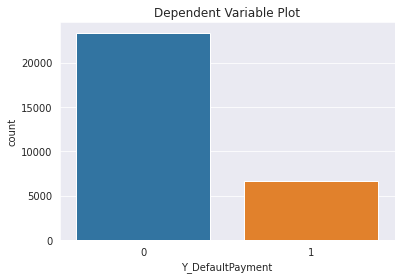

In [27]:
plt.rcParams["figure.figsize"] = (6,4)
sns.set_style(style='darkgrid')
graph=sns.countplot(df.Y_DefaultPayment)
plt.title('Dependent Variable Plot')
plt.show()

Above graph depicts that Dependent Variable is Imbalanced in this dataset

### <b><u> Outlier Treatment</u></b>

IQR with 99% confidence interval of Continuous Variables

In [28]:
iqr_df=pd.DataFrame(index=continuous_variables,columns=['LowerLimit','UpperLimit','Max'])

In [29]:
for i in continuous_variables:
  iqr_df.loc[i]['UpperLimit']=df[i].quantile(.99)
  iqr_df.loc[i]['LowerLimit']=df[i].quantile(.01)
  iqr_df.loc[i]['Max']=float(max(df[i]))

In [30]:
iqr_df

,LowerLimit,UpperLimit,Max
CreditLimit,10000.0,500000.0,1000000.0
Age,22.0,60.0,79.0
LatestBill_Amount_Sept,-81.0,350110.68,964511.0
LatestBill_Amount_Aug,-200.0,337495.28,983931.0
LatestBill_Amount_July,-200.0,325030.39,1664089.0
LatestBill_Amount_June,-212.02,304997.27,891586.0
LatestBill_Amount_May,-232.01,285868.33,927171.0
LatestBill_Amount_April,-331.03,279505.06,961664.0
PrevBill_Amount_Sept,0.0,66522.18,873552.0
PrevBill_Amount_Aug,0.0,76651.02,1684259.0


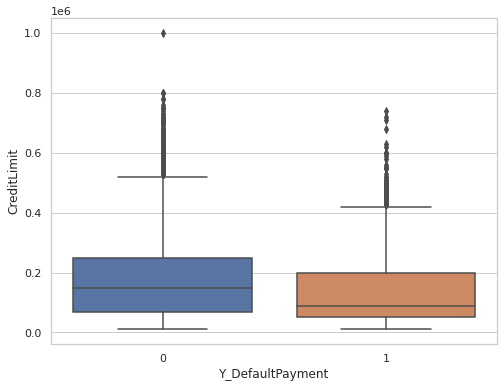

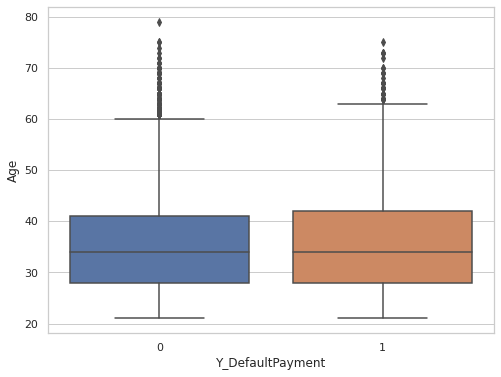

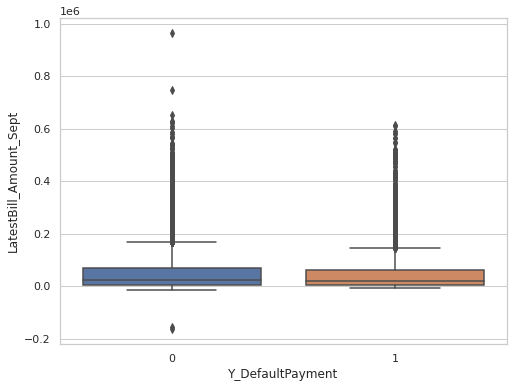

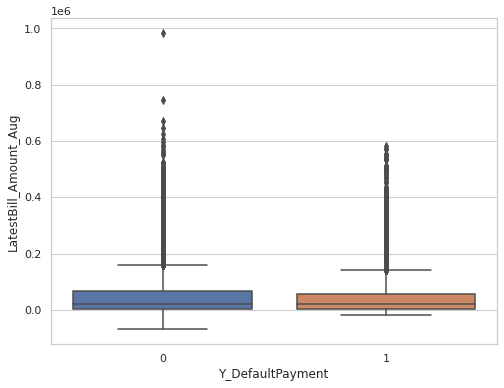

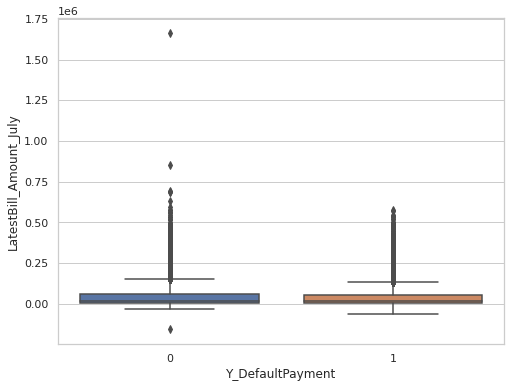

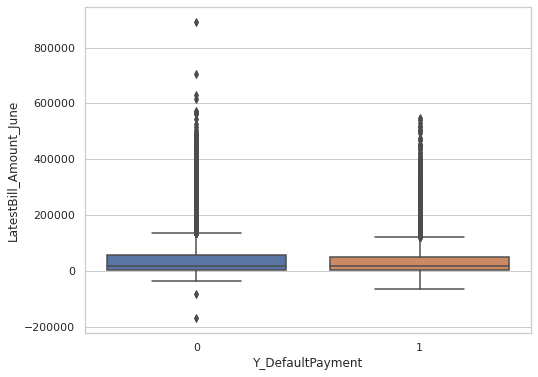

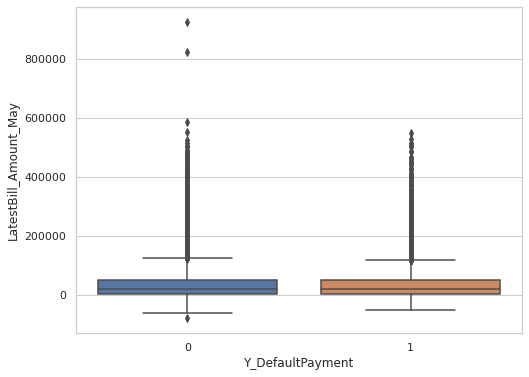

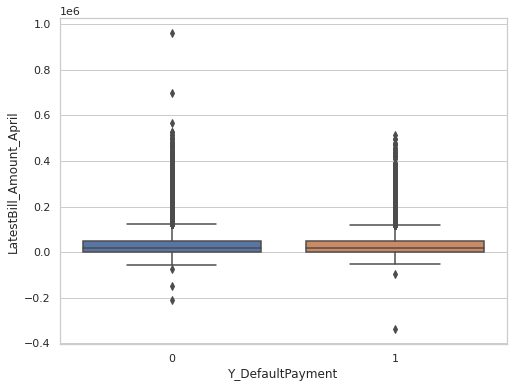

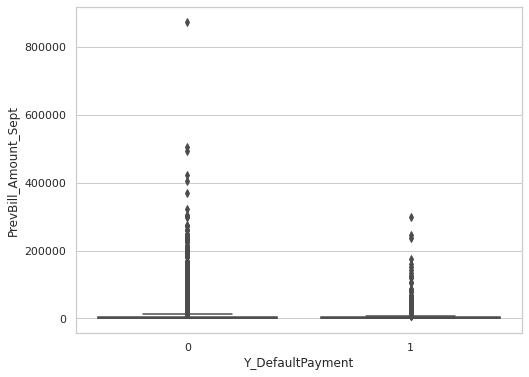

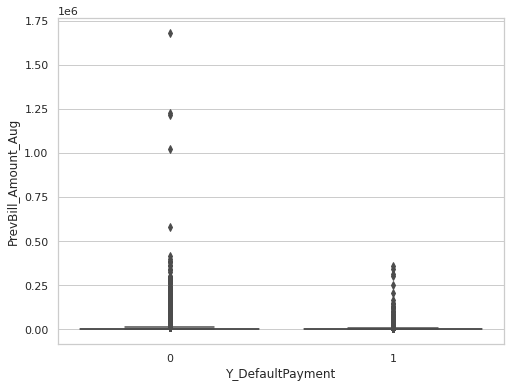

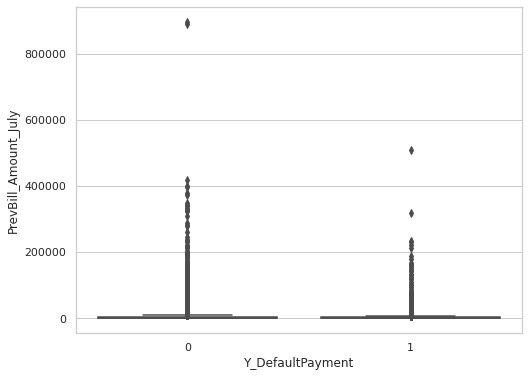

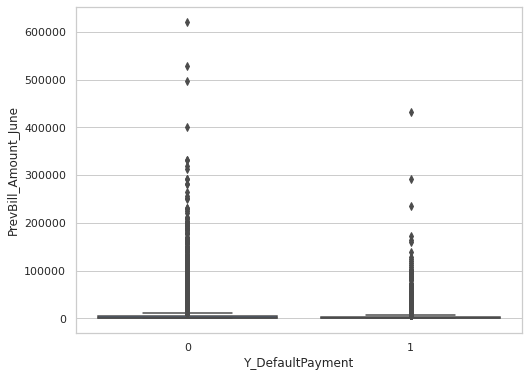

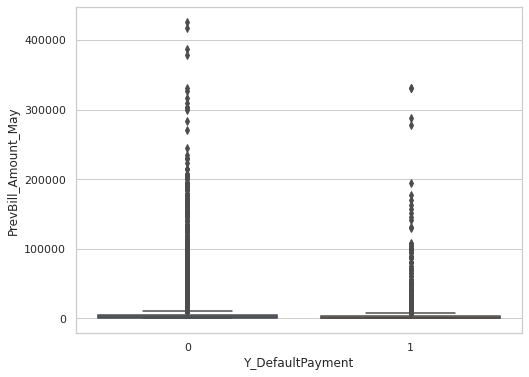

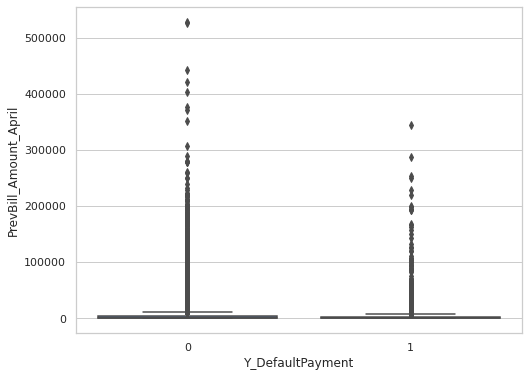

In [31]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.set_style(style='whitegrid')
for i in continuous_variables:
  sns.boxplot(y=df[i],x=df['Y_DefaultPayment'])
  plt.show()

Each Continuous Variable except Age has anomaly.

Also we have only 30k data points to train our model.From box plot we can conclude that outliers lie in Class 0 which is majority class in this dataset.

In [32]:
for i in continuous_variables:
  print(f"Number of data points of {i} greater than {round(iqr_df.loc[i]['UpperLimit'],2)} in the dataset are {len(df[df[i]>=iqr_df.loc[i]['UpperLimit']])}")

Number of data points of CreditLimit greater than 500000.0 in the dataset are 928
Number of data points of Age greater than 60.0 in the dataset are 339
Number of data points of LatestBill_Amount_Sept greater than 350110.68 in the dataset are 300
Number of data points of LatestBill_Amount_Aug greater than 337495.28 in the dataset are 300
Number of data points of LatestBill_Amount_July greater than 325030.39 in the dataset are 300
Number of data points of LatestBill_Amount_June greater than 304997.27 in the dataset are 300
Number of data points of LatestBill_Amount_May greater than 285868.33 in the dataset are 300
Number of data points of LatestBill_Amount_April greater than 279505.06 in the dataset are 300
Number of data points of PrevBill_Amount_Sept greater than 66522.18 in the dataset are 300
Number of data points of PrevBill_Amount_Aug greater than 76651.02 in the dataset are 300
Number of data points of PrevBill_Amount_July greater than 70000.0 in the dataset are 301
Number of data

From above results we can make that each variable has more 300 data points as Anomalies, Dropping off the Anomalies from each Variable would result in loosing out on considerable amount of Data from dataset which has direct impact on training of our model

We would need to analyze the distribution of each continuous variable to treat ouliers

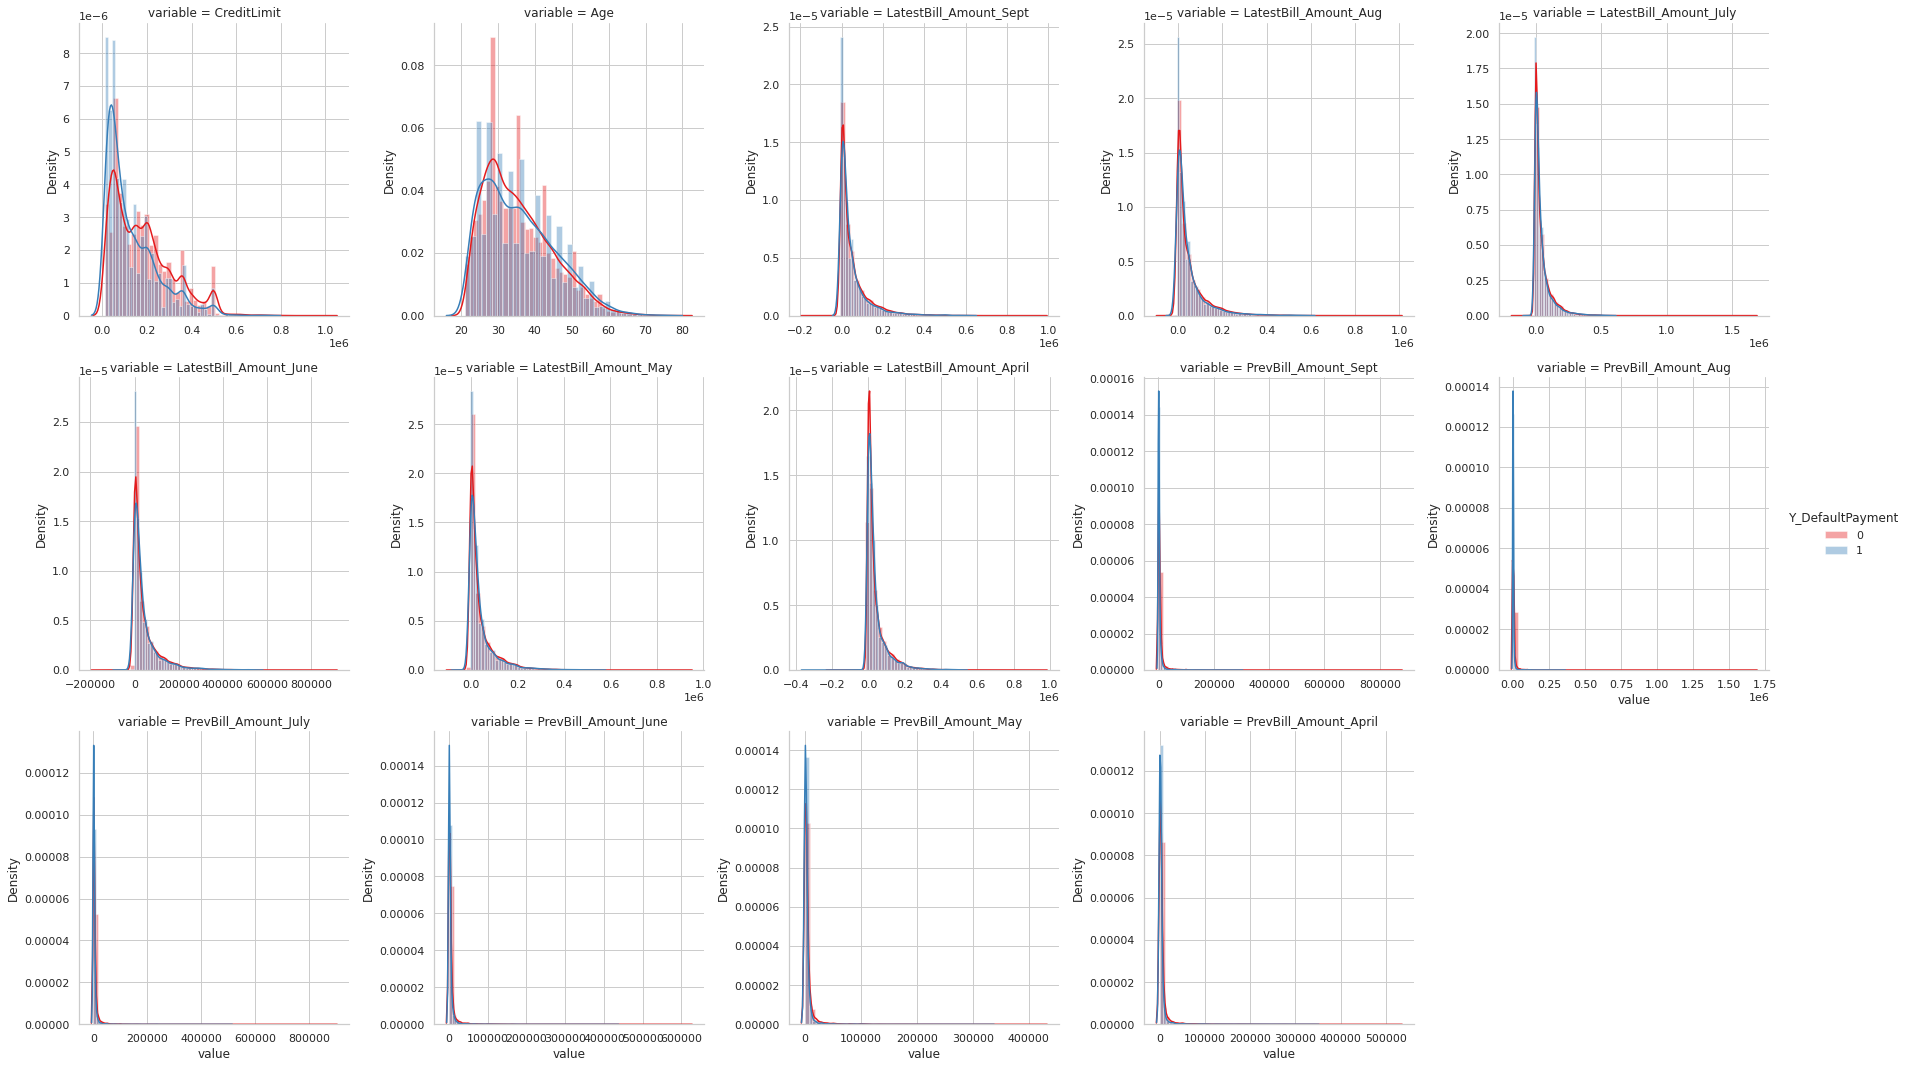

In [33]:
f = pd.melt( df, id_vars='Y_DefaultPayment', value_vars=continuous_variables)
g = sns.FacetGrid( f, hue='Y_DefaultPayment', col="variable", col_wrap=5, sharex=False, sharey=False,height=5,margin_titles=True,palette='Set1')
g = g.map( sns.distplot, "value", kde=True).add_legend()

Applying the x+1 Log transformation to all the Latest and Previous Bill Amount variables as we have 0 values in these variables

In [34]:
log_transform_var=[i for i in continuous_variables if i not in ['CreditLimit','Age']]
for i in log_transform_var:
  df[i]=df[i].apply(lambda x: np.log1p(x) if (x>0) else 0)

Visualizing Variables post Log transformation

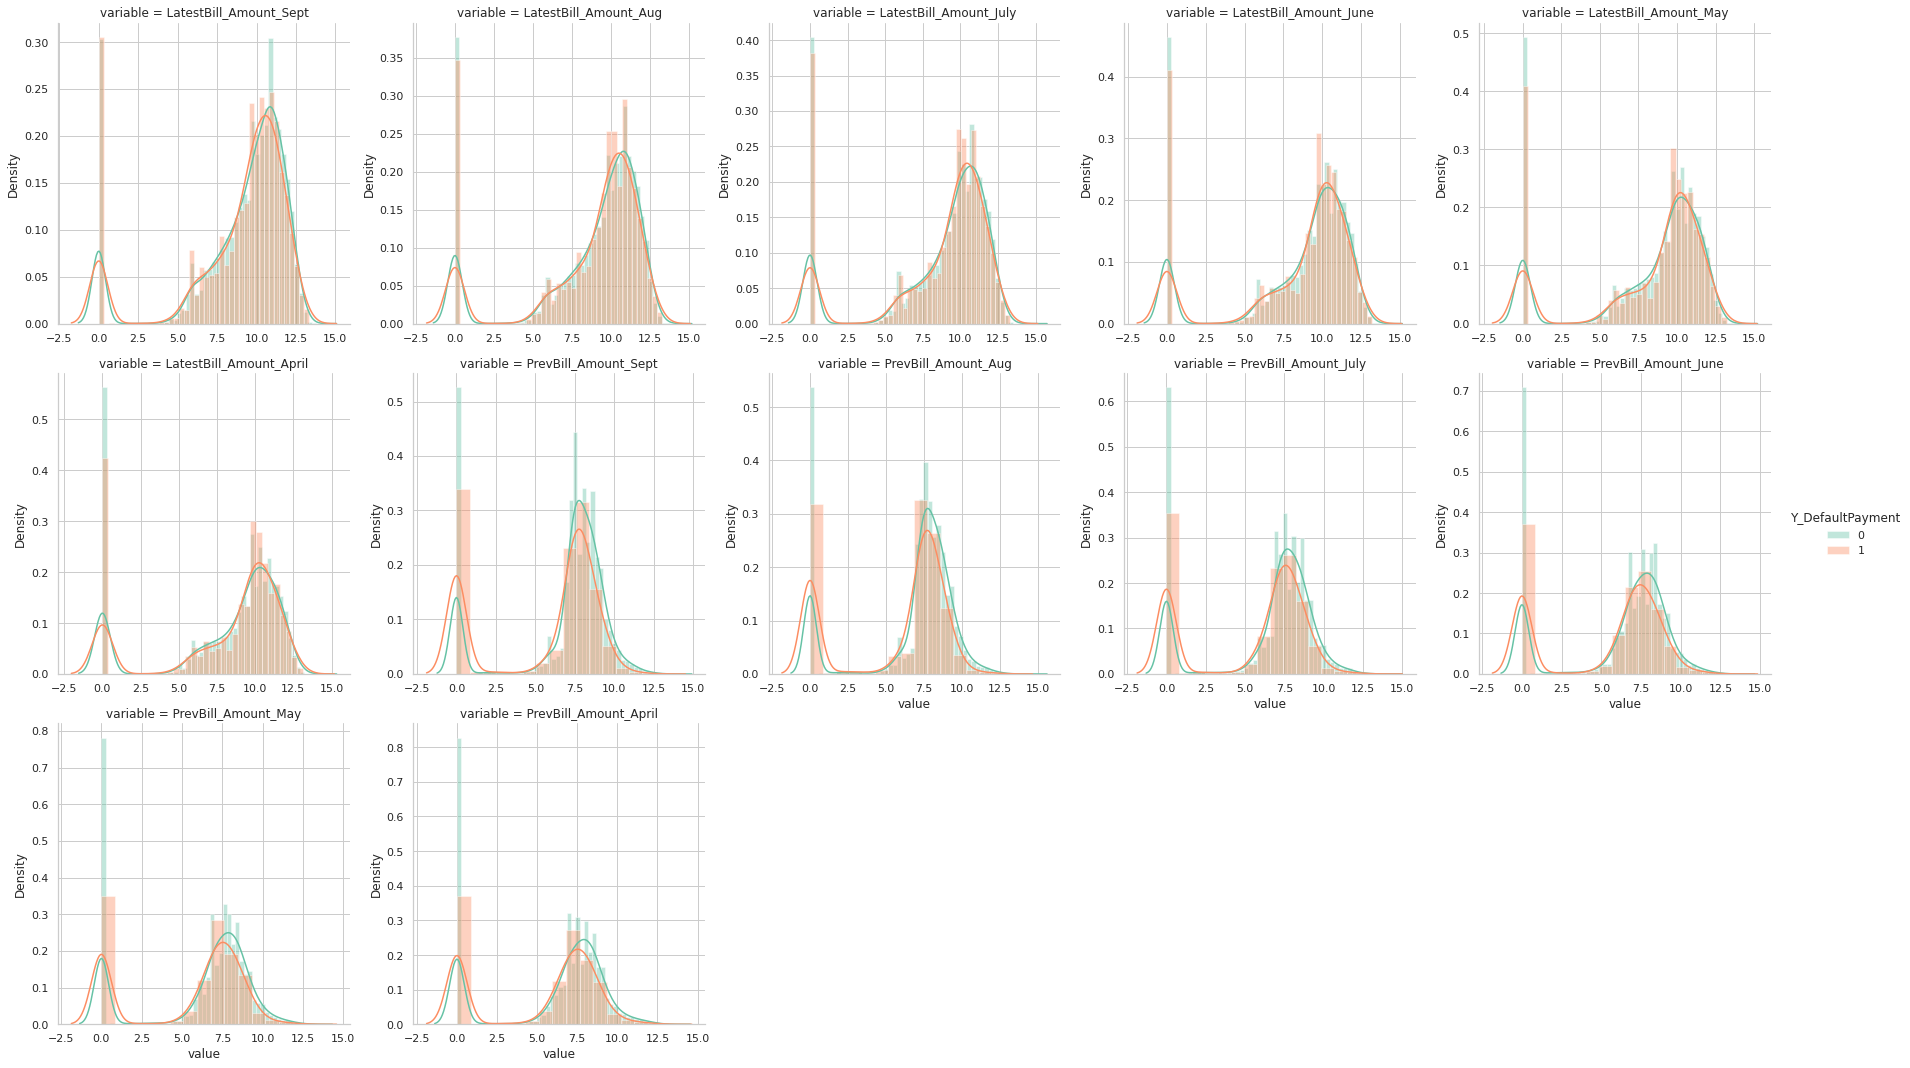

In [35]:
f = pd.melt( df, id_vars='Y_DefaultPayment', value_vars=log_transform_var)
g = sns.FacetGrid( f, hue='Y_DefaultPayment', col="variable", col_wrap=5, sharex=False, sharey=False,height=5,margin_titles=True,palette='Set2')
g = g.map( sns.distplot, "value", kde=True).add_legend()

1. Latest period and Previous period Bill Amount variables follow similar kind of distribution of data with positive skewness.
2. From the graph above we are seeing that Default Payment=1 is denser than Default Payment =0 in Previous Bill Amount variables
3. People with less Credit limit is defaulting the Credit Card.

#### Discrete Variables

In [36]:
df.tail(10)

,CreditLimit,Gender,Education,Marital_Status,Age,RepaymentStatus_Sept,RepaymentStatus_Aug,RepaymentStatus_July,RepaymentStatus_June,RepaymentStatus_May,RepaymentStatus_April,LatestBill_Amount_Sept,LatestBill_Amount_Aug,LatestBill_Amount_July,LatestBill_Amount_June,LatestBill_Amount_May,LatestBill_Amount_April,PrevBill_Amount_Sept,PrevBill_Amount_Aug,PrevBill_Amount_July,PrevBill_Amount_June,PrevBill_Amount_May,PrevBill_Amount_April,Y_DefaultPayment
29991,140000,1,2,1,41,0,0,0,0,0,0,11.837368,11.828779,11.843027,11.836913,10.813277,10.739045,8.699681,8.853808,8.349721,7.317212,7.601402,7.601402,0
29992,210000,1,2,1,34,3,2,2,2,2,2,7.824446,7.824446,7.824446,7.824446,7.824446,7.824446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
29993,10000,1,3,1,43,0,0,0,-2,-2,-2,9.082848,9.249657,0.000000,0.000000,0.000000,0.000000,7.601402,0.000000,0.000000,0.000000,0.000000,0.000000,0
29994,100000,1,1,2,38,0,-1,-1,0,0,0,8.020599,7.264030,11.542455,11.165168,11.148708,10.915179,7.601402,11.624333,8.294300,8.006701,7.601402,7.601402,0
29995,80000,1,2,2,34,2,2,2,2,2,2,11.192142,11.260726,11.282065,11.258291,11.321862,11.304165,8.853808,8.160804,0.000000,8.853808,0.000000,8.294300,1
29996,220000,1,3,1,39,0,0,0,0,0,0,12.149232,12.169492,12.247051,11.385149,10.349391,9.679156,9.047939,9.903538,8.517993,8.022241,8.517393,6.908755,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,7.428927,7.511525,8.161375,9.102755,8.554682,0.000000,7.516433,8.168203,9.104869,4.867534,0.000000,0.000000,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,8.179200,8.118803,7.922624,9.946499,9.932221,9.870861,0.000000,0.000000,9.998843,8.343078,7.601402,8.039480,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,0.000000,11.269324,11.242494,10.873793,9.380589,10.798452,11.360951,8.134468,7.072422,7.563720,10.877387,7.498316,1
30000,50000,1,2,1,46,0,0,0,0,0,0,10.777497,10.797655,10.815067,10.506053,10.386808,9.636523,7.639642,7.496097,7.266129,6.908755,6.908755,6.908755,1


Wherever the Repayment Status is positive for 6 months for those records Default Payment seems to be 1 in most of the cases. 
Lets visualize by creating a new Variable in temporary dataframe with the summition of Repayment Status

In [37]:
temp_df=df.copy()
temp_df['Total_RepaymentStatus_Score']= df.apply(lambda x: (x['RepaymentStatus_April']+x['RepaymentStatus_May']+x['RepaymentStatus_June']+
                                            x['RepaymentStatus_July']+x['RepaymentStatus_Aug']+x['RepaymentStatus_Sept']),axis=1)

In [38]:
temp_df[temp_df['Y_DefaultPayment']==1]

,CreditLimit,Gender,Education,Marital_Status,Age,RepaymentStatus_Sept,RepaymentStatus_Aug,RepaymentStatus_July,RepaymentStatus_June,RepaymentStatus_May,RepaymentStatus_April,LatestBill_Amount_Sept,LatestBill_Amount_Aug,LatestBill_Amount_July,LatestBill_Amount_June,LatestBill_Amount_May,LatestBill_Amount_April,PrevBill_Amount_Sept,PrevBill_Amount_Aug,PrevBill_Amount_July,PrevBill_Amount_June,PrevBill_Amount_May,PrevBill_Amount_April,Y_DefaultPayment,Total_RepaymentStatus_Score
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1,-2.0
2,120000,2,2,2,26,-1,2,0,0,0,2,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1,3.0
14,70000,1,2,2,30,1,2,2,0,0,2,11.094421,11.117955,11.092885,11.109204,10.495100,10.515831,8.071219,0.000000,8.006701,8.006701,7.313887,0.000000,1,7.0
17,20000,1,1,2,24,0,0,2,2,2,2,9.640628,9.798738,9.765891,9.816785,9.792891,9.857705,8.071219,0.000000,7.313887,0.000000,7.409136,0.000000,1,8.0
22,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,5.758902,5.758902,5.758902,0.000000,6.450470,5.758902,5.758902,5.758902,0.000000,6.450470,5.758902,0.000000,1,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,210000,1,2,1,34,3,2,2,2,2,2,7.824446,7.824446,7.824446,7.824446,7.824446,7.824446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,13.0
29995,80000,1,2,2,34,2,2,2,2,2,2,11.192142,11.260726,11.282065,11.258291,11.321862,11.304165,8.853808,8.160804,0.000000,8.853808,0.000000,8.294300,1,12.0
29998,30000,1,2,2,37,4,3,2,-1,0,0,8.179200,8.118803,7.922624,9.946499,9.932221,9.870861,0.000000,0.000000,9.998843,8.343078,7.601402,8.039480,1,8.0
29999,80000,1,3,1,41,1,-1,0,0,0,-1,0.000000,11.269324,11.242494,10.873793,9.380589,10.798452,11.360951,8.134468,7.072422,7.563720,10.877387,7.498316,1,-1.0


Total 6636 Records in this dataset has Default Payment =1 , 

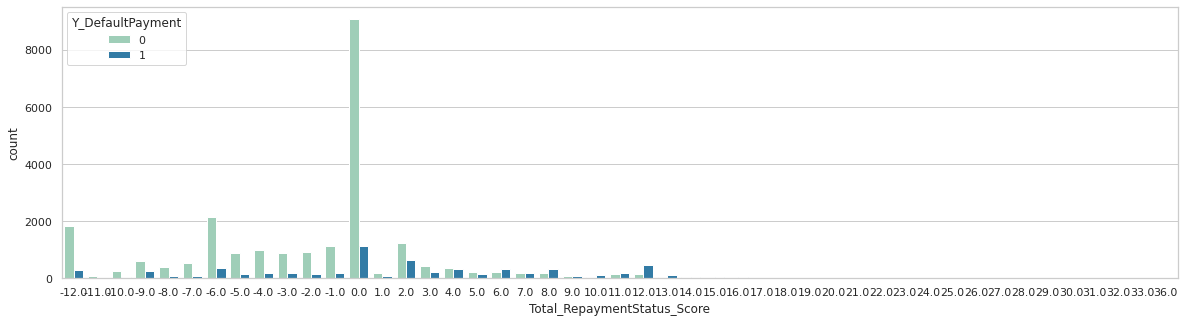

In [39]:
plt.figure(figsize=[20,5])
sns.countplot(temp_df.Total_RepaymentStatus_Score,hue=temp_df.Y_DefaultPayment,palette='YlGnBu')

Above graph depicts that as our score is increasing towards right of zero proportion of Defaulters wrt Non Defaulters is increasing as compared to the score towards the left of zero.

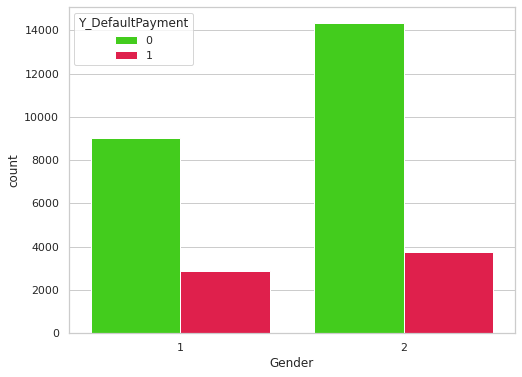

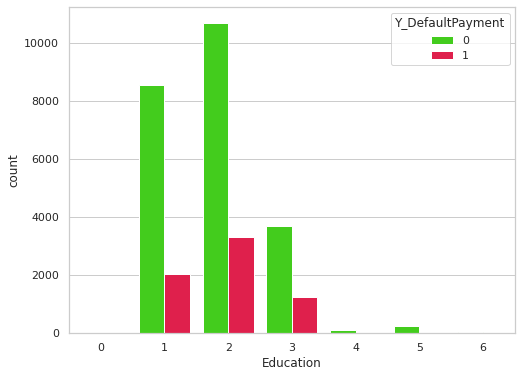

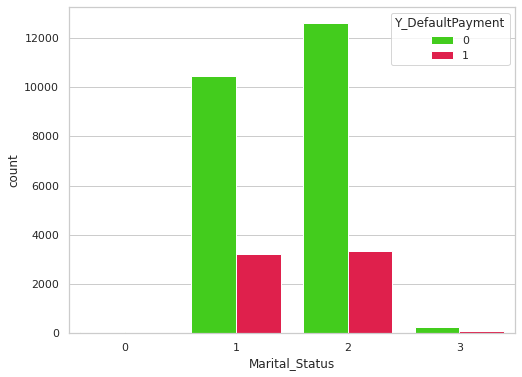

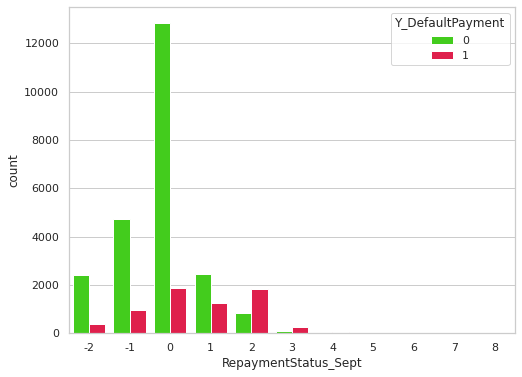

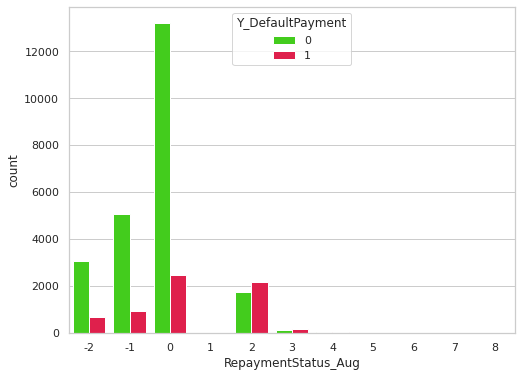

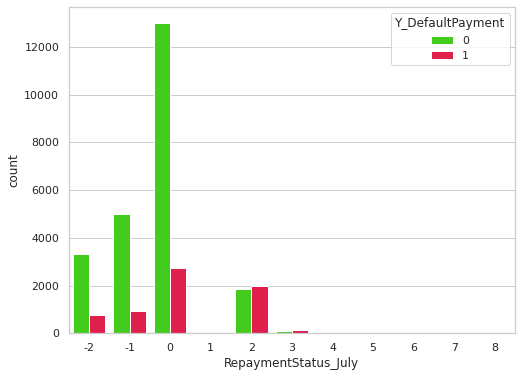

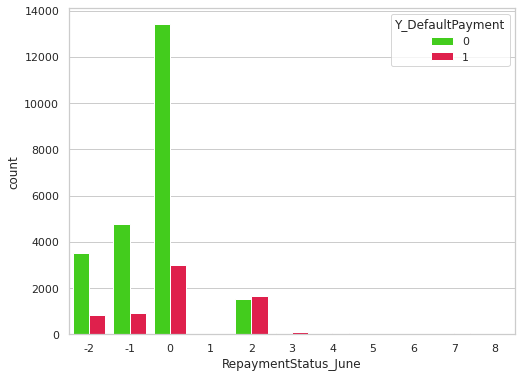

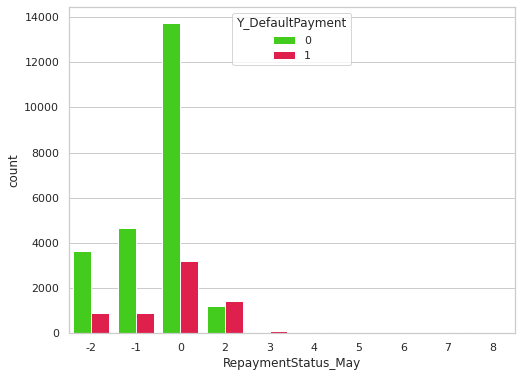

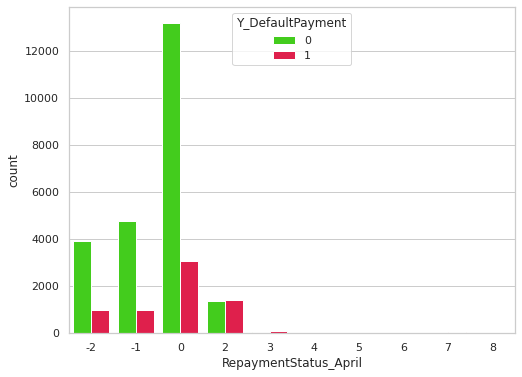

In [40]:
for j in discrete_variables:
  if(j!='Y_DefaultPayment'):
    sns.countplot(x=j,data=df,hue='Y_DefaultPayment',palette='prism')
    plt.show()

Conclusions from above plots : 
1. Gender : There are more records with value 2 (Female) with default value as 0 and ratio of Defaulters to Non Defaulter is higher in case of female.
2. Education : Credit Card holders are mostly University students in this dataset. Out of all the categories of Education, university holders are defaulters with highest number.

In [41]:
len(df[(df['Education']>4)])

331

We dont have information about Education greater than 4 and There are 331 records with Education > 4, So We can impute the 331 records with others category i.e value=4

In [42]:
df['Education'].replace(to_replace=[5,6],value=4,inplace=True)

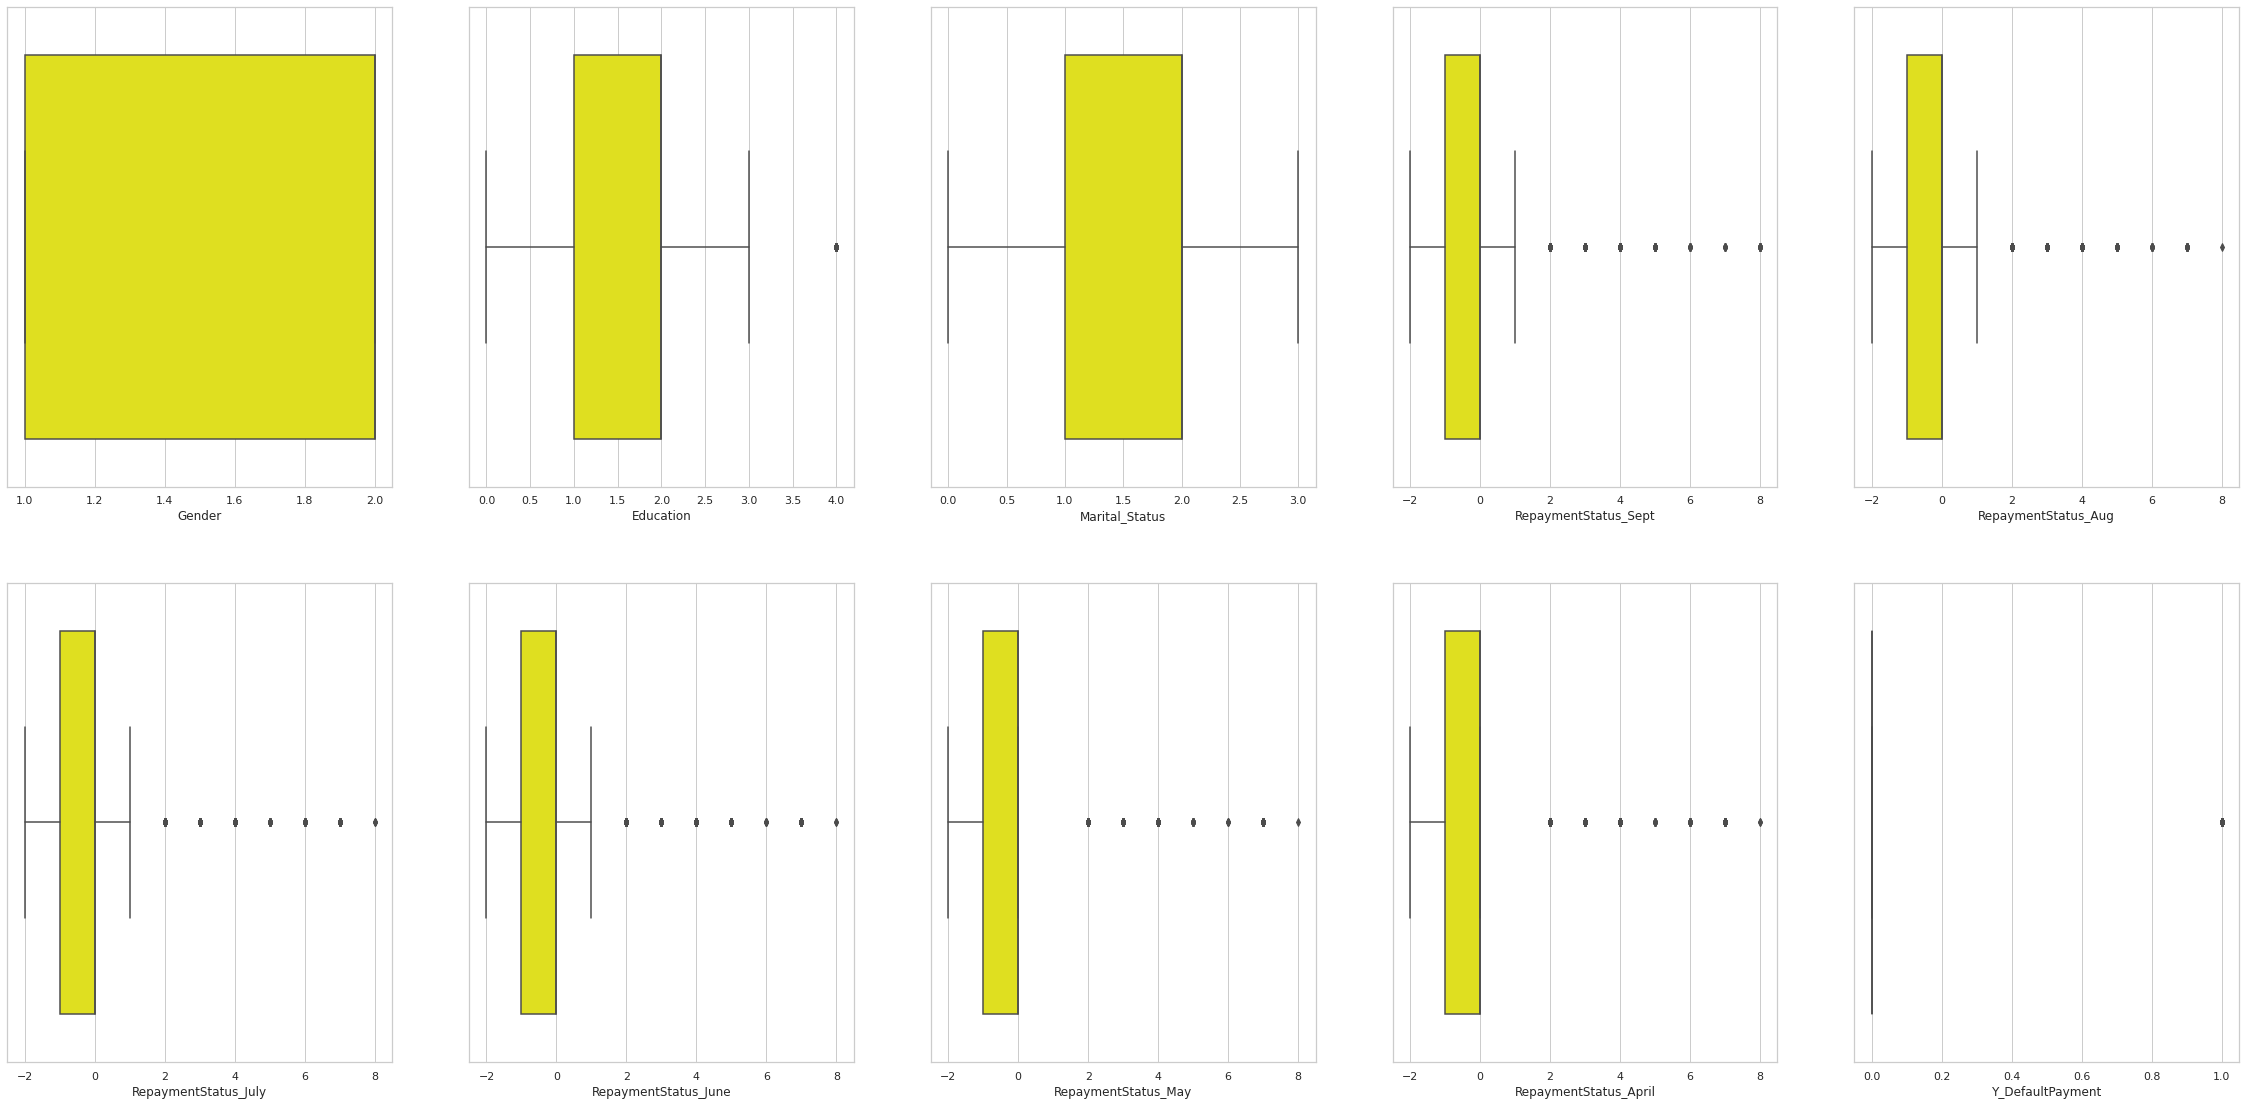

In [43]:
plt.figure(figsize=[40,30])
for i,col in enumerate(df[discrete_variables]):
 plt.subplot(3,5,i+1)
 sns.boxplot(x=df[col],color='yellow')
plt.show()

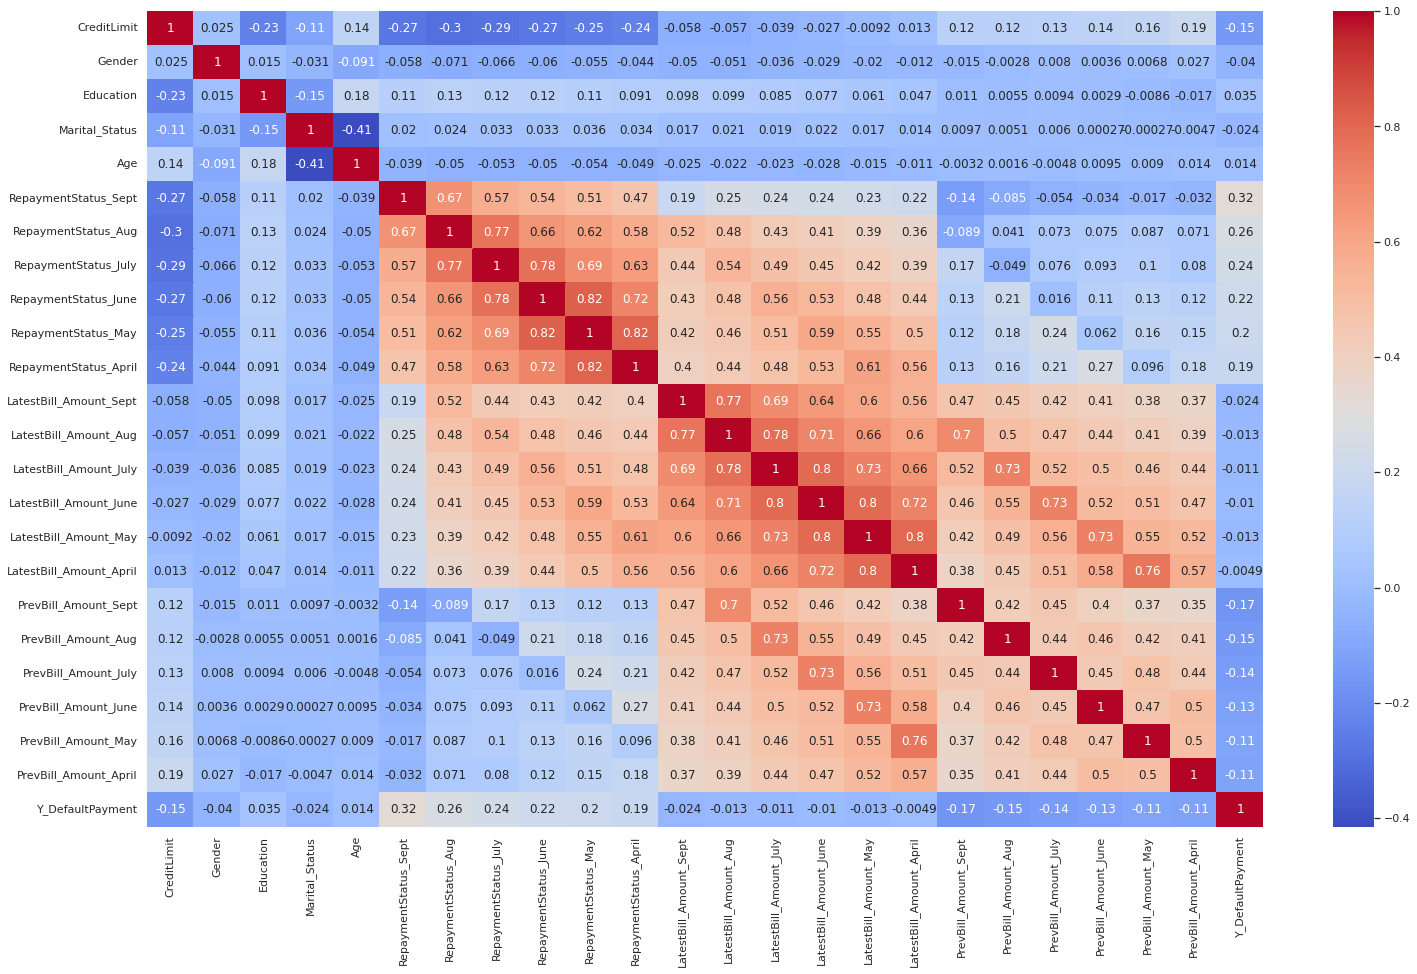

In [44]:
plt.figure(figsize=[25,15])
correlation=df.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True)

Out of all the factors our dependent variable is mostly correlated with RepaymentStatus_Sept and it is decreasing with Repayment Status of previous months.

## <b><u>Handling Class Imbalance</u></b>

Creating Data Points of Minority Class using SMOTE Technique

In [45]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[independent_variables], df[dependent_variable])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


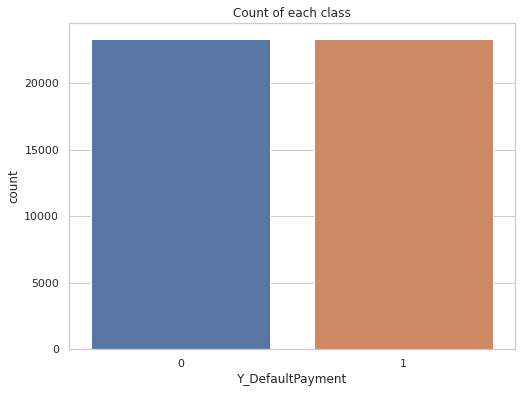

In [46]:
sns.countplot(y_smote.Y_DefaultPayment)
plt.title('Count of each class')
plt.show()

### Scatter Plot of two Continuous Variable to visualize the newly created synthetic data points

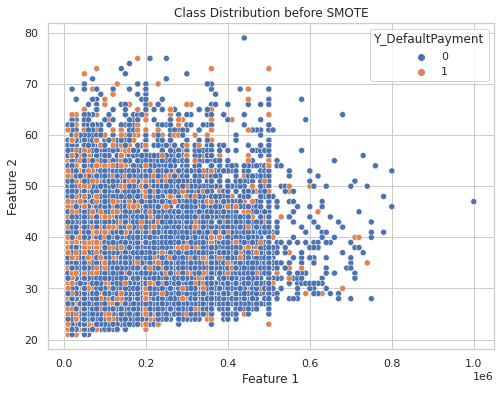

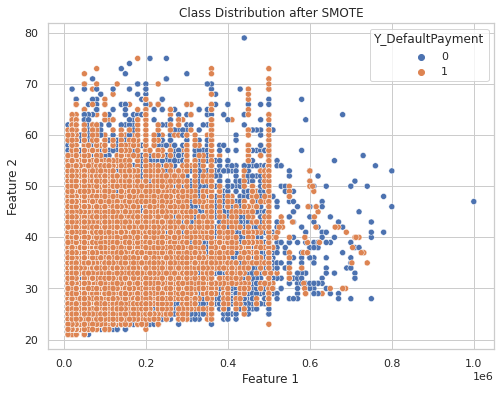

In [47]:
# Before SMOTE is applied
sns.scatterplot(x =df['CreditLimit'], y = df['Age'], hue = df.Y_DefaultPayment)
plt.title('Class Distribution before SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#After smote is applied
sns.scatterplot(x =x_smote['CreditLimit'], y = x_smote['Age'], hue = y_smote.Y_DefaultPayment)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## <b><u>Data Preparation for Modelling</u></b>

### Standardization of Data

In [48]:
scale=StandardScaler()
scaled_df=scale.fit_transform(x_smote)
print('Shape of Balanced data is :',x_smote.shape)
print('Shape of scaled data is :',scaled_df.shape)

Shape of Balanced data is : (46728, 23)
Shape of scaled data is : (46728, 23)


In [49]:
new_df=pd.DataFrame(scaled_df)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-1.063658,0.979830,0.340433,-0.913866,-1.234949,1.628742,1.594384,-0.801843,-0.751905,-1.559965,-1.523118,-0.223845,-0.228371,-0.609211,-2.338207,-2.238110,-2.115280,-1.883155,0.078900,-1.775714,-1.702446,-1.690039,-1.634032
1,-0.271394,0.979830,0.340433,1.022433,-1.017539,-1.042740,1.594384,0.009884,0.061820,0.116126,1.812977,-0.340270,-0.398557,-0.227596,-0.122853,-0.060165,-0.026916,-1.883155,0.190419,0.266453,0.319162,-1.690039,0.538336
2,-0.509074,0.979830,0.340433,1.022433,-0.147897,-0.152246,-0.033229,0.009884,0.061820,0.116126,0.144930,0.396158,0.209361,0.227698,0.281375,0.331308,0.376223,0.304979,0.311849,0.266453,0.319162,0.319663,0.800113
3,-0.825979,0.979830,0.340433,-0.913866,0.178219,-0.152246,-0.033229,0.009884,0.061820,0.116126,0.144930,0.542426,0.567688,0.590384,0.467751,0.508067,0.541937,0.387296,0.400859,0.320296,0.347025,0.339053,0.340388
4,-0.825979,-1.020585,0.340433,-0.913866,2.352323,-1.042740,-0.033229,-0.801843,0.061820,0.116126,0.144930,0.019502,-0.053417,0.500795,0.385174,0.397466,0.429736,0.387296,1.269835,0.946810,0.961844,0.211432,0.229886


### Train Test Split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y_smote.Y_DefaultPayment,random_state=True,test_size=0.2,
                                               stratify=y_smote.Y_DefaultPayment)

In [51]:
print("Shape of Training set is ",x_train.shape,y_train.shape)

Shape of Training set is  (37382, 23) (37382,)


In [52]:
print("Shape of Test set is ",x_test.shape,y_test.shape)

Shape of Test set is  (9346, 23) (9346,)


## <b><u>Logistic Regression</u></b>

In [53]:
lr = LogisticRegression()
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],'max_iter':[100,500]}
logistic = GridSearchCV(lr,param_grid=lr_params,scoring='roc_auc',cv=5)
logistic.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 500],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [54]:
print(logistic.best_params_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}


In [55]:
print(logistic.best_score_)

0.7938145332441595


In [56]:
y_pred_train_log=logistic.predict(x_train)
y_pred_test_log=logistic.predict(x_test)

### <u><b>Performance</b></u>

In [ ]:
performance_metric=pd.DataFrame(columns=['Model','Accuracy_Score','Precision_Score','Recall_Score','F1_Score','AUC_ROC_Score'])

In [ ]:
def per_metric(model,y_test,y_pred):

  '''This method would return the dictionary of score of 
  different performance metric '''

  per_dict={'Model':model}
  per_dict.update({'Accuracy_Score':accuracy_score(y_test,y_pred)})
  per_dict.update({'Precision_Score':precision_score(y_test,y_pred)})
  per_dict.update({'Recall_Score':recall_score(y_test,y_pred)})
  per_dict.update({'F1_Score':f1_score(y_test,y_pred)})
  per_dict.update({'AUC_ROC_Score':roc_auc_score(y_test,y_pred)})
  return per_dict

#### Confusion Matrix

In [ ]:
print(f"Confusion Matrix of Training set is : \n {confusion_matrix(y_train,y_pred_train_log)}")
print(f"Confusion Matrix of Test set is : \n{confusion_matrix(y_test,y_pred_test_log)}")

Confusion Matrix of Training set is : 
 [[13916  4775]
 [ 5577 13114]]
Confusion Matrix of Test set is : 
[[3493 1180]
 [1387 3286]]


[[3493 1180]
 [1387 3286]]


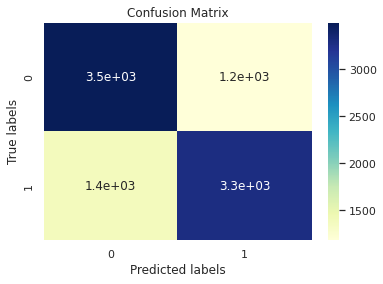

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
print(confusion_matrix(y_test,y_pred_test_log))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_test_log),annot=True,cmap='YlGnBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

#### Auc Roc Curve

In [ ]:
print(f"AUC ROC Score of Training set is : {roc_auc_score(y_train,y_pred_train_log)}")
print(f"AUC ROC Score of Test set is : {roc_auc_score(y_test,y_pred_test_log)}")

AUC ROC Score of Training set is : 0.7230752768712213
AUC ROC Score of Test set is : 0.7253370425850632


Text(0, 0.5, 'True Positive rate')

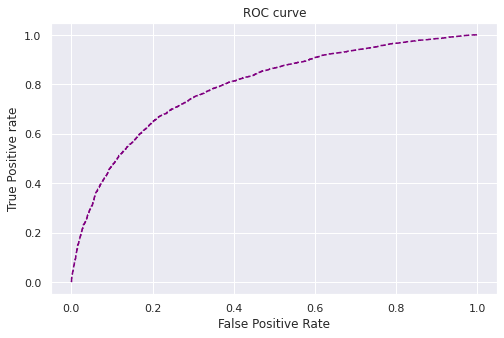

In [ ]:
Y_pred_prob = logistic.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, Y_pred_prob[:,1], pos_label=1)
#ROC Curve Plot
plt.figure(figsize=[8,5])
sns.set_style(style='darkgrid')
plt.plot(fpr1, tpr1, linestyle='--',color='purple', label='Logistic Regression')
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

#### Test and Training Performance Metric

In [ ]:
performance_metric=performance_metric.append(pd.DataFrame(per_metric('Logistic Regression',y_test,y_pred_test_log),index=[0]))
performance_metric

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.725337,0.735781,0.703189,0.719116,0.725337


In [ ]:
performance_metric_train=pd.DataFrame(columns=['Model','Accuracy_Score','Precision_Score','Recall_Score','F1_Score','AUC_ROC_Score'])
performance_metric_train=performance_metric_train.append(pd.DataFrame(per_metric('Logistic Regression',y_train,y_pred_train_log),index=[0]))
performance_metric_train

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.723075,0.733076,0.701621,0.717004,0.723075


## <b><u>Random Classifier</b></u>

In [ ]:
def cross_validate_method(param,model_class):
  for i in param:
    train_score, test_score= validation_curve(model_class,X = x_train, y = y_train, 
                                param_name = i,param_range = param[i], cv = 3)
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)
    
    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)
    plt.plot(param[i], mean_train_score,
     label = "Training Score", color = 'b')
    plt.plot(param[i], mean_test_score,
      label = "Cross Validation Score", color = 'g')
    
    # Creating the plot
    plt.title("Validation Curve")
    plt.xlabel(f"Number of {i}")
    plt.legend(loc = 'best')
    plt.ylabel("Accuracy")
    plt.show()

### Using Validation Curve

In [ ]:
params={'n_estimators':[10,20,100,150,200,300,500],'max_depth':[3,4,5,10,20,50]}

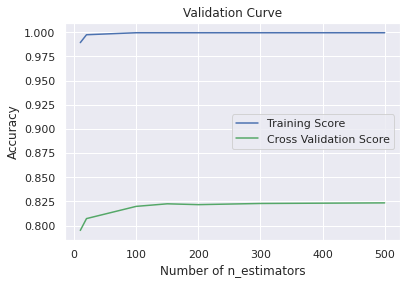

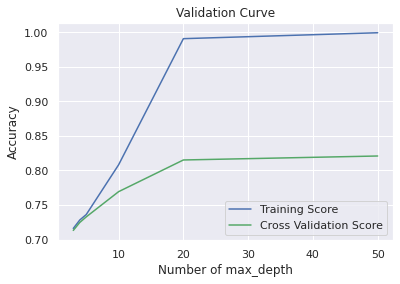

In [ ]:
rfc=RandomForestClassifier()
cross_validate_method(params,rfc)

It seems with value max_depth = 20 Model would overfit to training values. We can take mid value of 10 & 20, max_depth = 15

In [ ]:
new_rf=RandomForestClassifier(n_estimators=500,max_depth=15)
new_rf.fit( x_train, y_train )
newRFscore = cross_val_score(new_rf, x_train, y_train, cv=5)

In [ ]:
print(newRFscore.mean())

0.8025520996688759


In [ ]:
y_pred_train=new_rf.predict(x_train)
y_pred_test=new_rf.predict(x_test)

In [ ]:
pd.DataFrame(per_metric('Random Forest CV',y_train,y_pred_train),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Random Forest CV,0.91116,0.919762,0.900915,0.910241,0.91116


In [ ]:
pd.DataFrame(per_metric('Random Forest CV Test',y_test,y_pred_test),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Random Forest CV Test,0.801198,0.815937,0.777873,0.79645,0.801198


Model seems to have overfit. GridSearch CV can be used to find the best set of hyper parameters for this dataset

### Using GridSearchCV

In [ ]:
rfc=RandomForestClassifier(random_state=42)
params={'n_estimators':[200,500],'max_depth':[4,10,11,12]}
rfc_grid=GridSearchCV(rfc,params,cv=3)
rfc_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 10, 11, 12],
                         'n_estimators': [200, 500]})

In [ ]:
print(rfc_grid.best_params_)

{'max_depth': 12, 'n_estimators': 500}


In [ ]:
print(rfc_grid.best_score_)

0.7815259521961059


In [ ]:
y_pred_train_rfc=rfc_grid.predict(x_train)
y_pred_test_rfc=rfc_grid.predict(x_test)

In [ ]:
pd.DataFrame(per_metric('RF GridSearchCV Train',y_train,y_pred_train_rfc),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,RF GridSearchCV Train,0.841394,0.862022,0.812905,0.836743,0.841394


In [ ]:
pd.DataFrame(per_metric('RF GridSearchCV Test',y_test,y_pred_test_rfc),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,RF GridSearchCV Test,0.785149,0.80291,0.755831,0.77866,0.785149


### <b><u>Performance</b></u>

####  Confusion Matrix 

In [ ]:
print(f"Confusion Matrix of Training set is : \n {confusion_matrix(y_train,y_pred_train_rfc)}")
print(f"Confusion Matrix of Test set is : \n{confusion_matrix(y_test,y_pred_test_rfc)}")

Confusion Matrix of Training set is : 
 [[16259  2432]
 [ 3497 15194]]
Confusion Matrix of Test set is : 
[[3806  867]
 [1141 3532]]


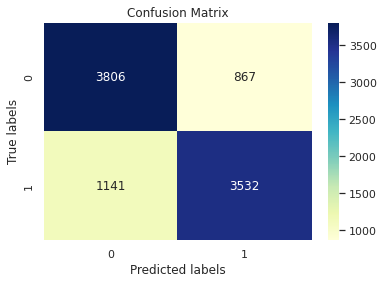

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_test_rfc),annot=True,cmap='YlGnBu',fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

#### AUC ROC Curve

Text(0, 0.5, 'True Positive rate')

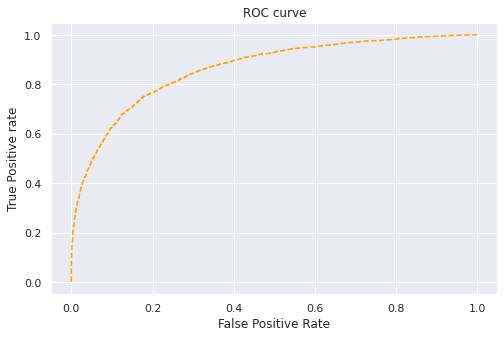

In [ ]:
Y_pred_prob = rfc_grid.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, Y_pred_prob[:,1], pos_label=1)
#ROC Curve Plot
plt.figure(figsize=[8,5])
sns.set_style(style='darkgrid')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

#### Performance Metric

In [ ]:
performance_metric=performance_metric.append(pd.DataFrame(per_metric('Random Forest Classifier',y_test,y_pred_test_rfc),index=[1]))
performance_metric

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.725337,0.735781,0.703189,0.719116,0.725337
1,Random Forest Classifier,0.785149,0.802910,0.755831,0.778660,0.785149


In [ ]:
performance_metric_train=performance_metric_train.append(pd.DataFrame(per_metric('Random Forest Classifier',y_train,y_pred_train_rfc),index=[1]))
performance_metric_train

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.723075,0.733076,0.701621,0.717004,0.723075
1,Random Forest Classifier,0.841394,0.862022,0.812905,0.836743,0.841394


#### Feature Importance

In [ ]:
rfc_grid.best_estimator_.feature_importances_

array([0.03836287, 0.0571346 , 0.02756232, 0.04090356, 0.02762346,
       0.14366157, 0.08624908, 0.05445879, 0.04247685, 0.03286017,
       0.03152259, 0.04593537, 0.03164062, 0.028187  , 0.02665764,
       0.02622352, 0.02404069, 0.0527854 , 0.04722035, 0.03568312,
       0.03754554, 0.02943115, 0.03183372])

## <u><b>XG Boost Classifier</u></b>

### Using cross_val_score

In [ ]:
xgbC=XGBClassifier()
xgbC.fit(x_train,y_train)
scoresXG = cross_val_score(xgbC, x_train, y_train, cv=5)

In [ ]:
y_pred_train=xgbC.predict(x_train)
y_pred_test=xgbC.predict(x_test)

#### Performance using cross_val_score

In [ ]:
#Train Set Performance
pd.DataFrame(per_metric('XGBoost_CVS',y_train,y_pred_train),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,XGBoost_CVS,0.776095,0.793494,0.746456,0.769256,0.776095


In [ ]:
#Test Set Performance
pd.DataFrame(per_metric('XGBoost_CVS',y_test,y_pred_test),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,XGBoost_CVS,0.765675,0.781073,0.738284,0.759076,0.765675


Train and Test Performance seems pretty average. We can try improving the performance by tuning the hyper parameters

### Using Cross Validate

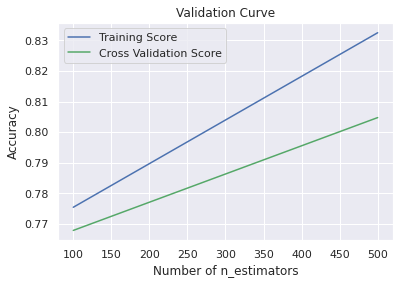

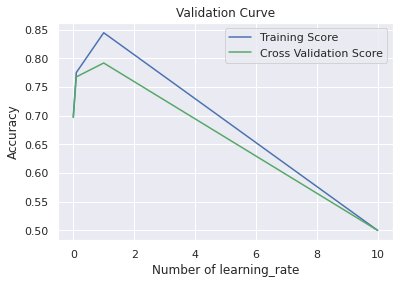

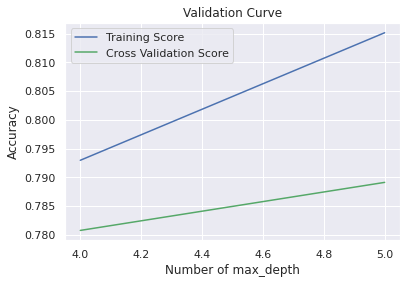

In [ ]:
xgb=XGBClassifier()
params={'n_estimators':[100,500],'learning_rate':[0.001,0.1,1,10],'max_depth':[4,5]}
cross_validate_method(params,xgb)

In [ ]:
xgbC=XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=5)
xgbC.fit(x_train,y_train)
xgb_cv = cross_val_score(xgbC, x_train, y_train, cv=5)

In [ ]:
print(xgb_cv.mean())

0.7703708744626735


In [ ]:
y_pred_train=xgbC.predict(x_train)
y_pred_test=xgbC.predict(x_test)

In [ ]:
print(f"Confusion Matrix of Training set is : \n {confusion_matrix(y_train,y_pred_train)}")
print(f"Confusion Matrix of Test set is : \n{confusion_matrix(y_test,y_pred_test)}")

Confusion Matrix of Training set is : 
 [[15302  3389]
 [ 4709 13982]]
Confusion Matrix of Test set is : 
[[3738  935]
 [1212 3461]]


In [ ]:
#Train Set Performance
pd.DataFrame(per_metric('XGBoost_CVS',y_train,y_pred_train),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,XGBoost_CVS,0.783372,0.804905,0.748061,0.775442,0.783372


In [ ]:
#Test Set Performance
pd.DataFrame(per_metric('XGBoost_CVS',y_test,y_pred_test),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,XGBoost_CVS,0.770276,0.787307,0.740638,0.763259,0.770276


###Using GridSearchCV

In [ ]:
xgbC=XGBClassifier()
param_grid={'n_estimators':[100,500],'learning_rate':[0.001,0.1,1,10],'max_depth':[4,5]}
xgbClassifier=GridSearchCV(xgbC,param_grid,cv=5,verbose=1)
xgbClassifier.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'max_depth': [4, 5], 'n_estimators': [100, 500]},
             verbose=1)

In [ ]:
print(xgbClassifier.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
print(xgbClassifier.best_score_)

0.8200204615359405


In [ ]:
xgbClassifier=XGBClassifier(n_estimators=500,max_depth=3,learning_rate=0.1)
xgbClassifier.fit(x_train,y_train)

XGBClassifier(n_estimators=500)

In [ ]:
y_pred_train_xgbC=xgbClassifier.predict(x_train)
y_pred_test_xgbC=xgbClassifier.predict(x_test)

### <u>Performance</u>

#### Confusion Matrix

In [ ]:
print(f"Confusion Matrix of Training set is : \n {confusion_matrix(y_train,y_pred_train_xgbC)}")
print(f"Confusion Matrix of Test set is : \n{confusion_matrix(y_test,y_pred_test_xgbC)}")

Confusion Matrix of Training set is : 
 [[15916  2775]
 [ 3749 14942]]
Confusion Matrix of Test set is : 
[[3839  834]
 [1043 3630]]


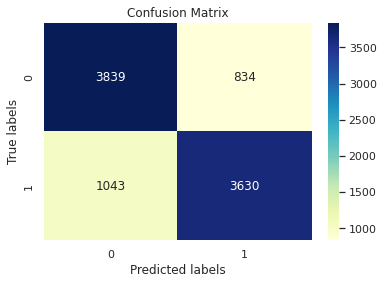

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_test_xgbC),annot=True,cmap='YlGnBu',fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

#### AUC ROC Curve

Text(0, 0.5, 'True Positive rate')

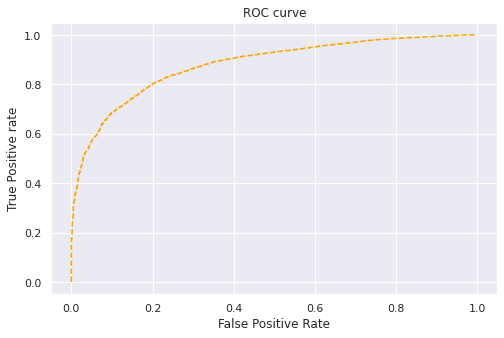

In [ ]:
Y_pred_prob = xgbClassifier.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, Y_pred_prob[:,1], pos_label=1)
#ROC Curve Plot
plt.figure(figsize=[8,5])
sns.set_style(style='darkgrid')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

#### Performance Metric of Train and Test

In [ ]:
performance_metric=performance_metric.append(pd.DataFrame(per_metric('XG Boost Classifier',y_test,y_pred_test_xgbC),index=[2]))
performance_metric

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.725337,0.735781,0.703189,0.719116,0.725337
1,Random Forest Classifier,0.785149,0.802910,0.755831,0.778660,0.785149
2,XG Boost Classifier,0.799165,0.813172,0.776803,0.794572,0.799165


In [ ]:
performance_metric_train=performance_metric_train.append(pd.DataFrame(per_metric('XG Boost Classifier',y_train,y_pred_train_xgbC),index=[2]))
performance_metric_train

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.723075,0.733076,0.701621,0.717004,0.723075
1,Random Forest Classifier,0.841394,0.862022,0.812905,0.836743,0.841394
2,XG Boost Classifier,0.825478,0.843371,0.799422,0.820809,0.825478


#### Feature Importance

## <b><u>KN Neighbours</b></u>

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(5,30)}
knn_cv= GridSearchCV(knn,param_grid,cv=5,verbose=1)
knn_cv.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=1)

In [ ]:
print(knn_cv.best_params_)

{'n_neighbors': 5}


In [ ]:
print(knn_cv.best_score_)

0.759724066949596


In [ ]:
y_pred_train_knn=knn_cv.predict(x_train)
y_pred_test_knn=knn_cv.predict(x_test)

### Performance

#### Confusion Matrix

In [ ]:
print(f"Confusion Matrix of Training set is : \n {confusion_matrix(y_train,y_pred_train_knn)}")
print(f"Confusion Matrix of Test set is : \n{confusion_matrix(y_test,y_pred_test_knn)}")

Confusion Matrix of Training set is : 
 [[15087  3604]
 [ 2153 16538]]
Confusion Matrix of Test set is : 
[[3369 1304]
 [ 884 3789]]


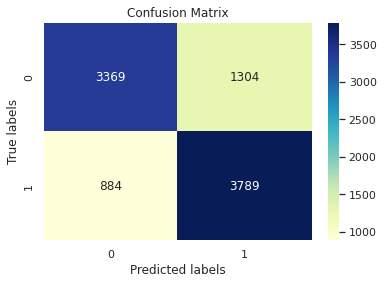

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_test_knn),annot=True,cmap='YlGnBu',fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

#### AUC ROC Curve

Text(0, 0.5, 'True Positive rate')

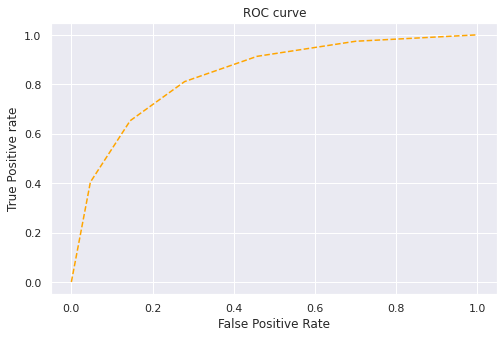

In [ ]:
Y_pred_prob = knn_cv.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, Y_pred_prob[:,1], pos_label=1)
#ROC Curve Plot
plt.figure(figsize=[8,5])
sns.set_style(style='darkgrid')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

#### Performance Metric of Test and Train

In [ ]:
performance_metric=performance_metric.append(pd.DataFrame(per_metric('KNN',y_test,y_pred_test_knn),index=[3]))
performance_metric

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.725337,0.735781,0.703189,0.719116,0.725337
1,Random Forest Classifier,0.785149,0.802910,0.755831,0.778660,0.785149
2,XG Boost Classifier,0.799165,0.813172,0.776803,0.794572,0.799165
3,KNN,0.765889,0.743962,0.810828,0.775957,0.765889


In [ ]:
performance_metric_train=performance_metric_train.append(pd.DataFrame(per_metric('KNN',y_train,y_pred_train_knn),index=[3]))
performance_metric_train

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.723075,0.733076,0.701621,0.717004,0.723075
1,Random Forest Classifier,0.841394,0.862022,0.812905,0.836743,0.841394
2,XG Boost Classifier,0.825478,0.843371,0.799422,0.820809,0.825478
3,KNN,0.845995,0.821070,0.884811,0.851750,0.845995


## <b><u>Support Vector Machine</b></u>

### SVC using Cross_val_score

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
svc_cv=cross_val_score(svc, x_train, y_train, cv=5)

In [ ]:
y_pred_train_svc=svc.predict(x_train)
y_pred_test_svc=svc.predict(x_test)

### SVC using GridSearchCV

In [ ]:
svc_gs=SVC()
param_grid={'C':[0.1,0.01,1,10],'gamma':[0.1,1,0.001],'kernel':['rbf']}
svc_grid=GridSearchCV(svc_gs,param_grid=param_grid,verbose=1,cv=5)
svc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 10], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
print(svc_grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
print(svc_grid.best_score_)

0.7852443194263728


In [ ]:
svc_grid=SVC(C=1,gamma=0.1,kernel='rbf',probability=True)
svc_grid.fit(x_train,y_train)

SVC(C=1, gamma=0.1, probability=True)

In [ ]:
y_pred_train_SVC=svc_grid.predict(x_train)
y_pred_test_SVC=svc_grid.predict(x_test)

### Performance

#### Confusion Matrix

In [ ]:
print(f"Confusion Matrix of Training set is : \n {confusion_matrix(y_train,y_pred_train_SVC)}")
print(f"Confusion Matrix of Test set is : \n{confusion_matrix(y_test,y_pred_test_SVC)}")

Confusion Matrix of Training set is : 
 [[15758  2933]
 [ 4043 14648]]
Confusion Matrix of Test set is : 
[[3748  925]
 [1159 3514]]


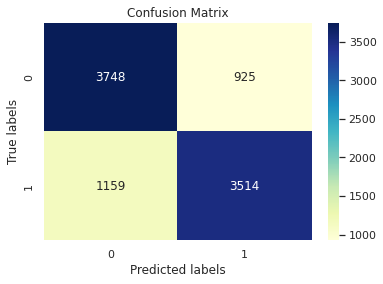

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_test_SVC),annot=True,cmap='YlGnBu',fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

#### AUC ROC Curve

Text(0, 0.5, 'True Positive rate')

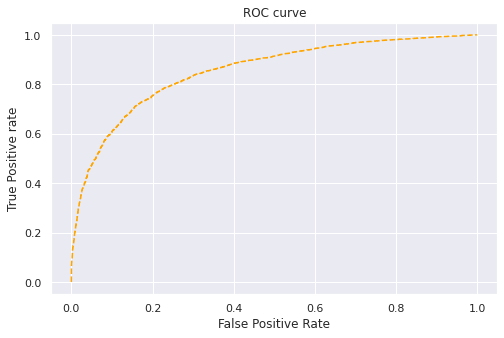

In [ ]:
Y_pred_prob = svc_grid.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, Y_pred_prob[:,1], pos_label=1)
#ROC Curve Plot
plt.figure(figsize=[8,5])
sns.set_style(style='darkgrid')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

Performance Metric of Test and Train

In [ ]:
performance_metric=performance_metric.append(pd.DataFrame(per_metric('SVC',y_test,y_pred_test_SVC),index=[4]))
performance_metric

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.725337,0.735781,0.703189,0.719116,0.725337
1,Random Forest Classifier,0.785149,0.802910,0.755831,0.778660,0.785149
2,XG Boost Classifier,0.799165,0.813172,0.776803,0.794572,0.799165
3,KNN,0.765889,0.743962,0.810828,0.775957,0.765889
4,SVC,0.777017,0.791620,0.751979,0.771291,0.777017


In [ ]:
performance_metric_train=performance_metric_train.append(pd.DataFrame(per_metric('SVC',y_train,y_pred_train_SVC),index=[4]))
performance_metric_train

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.723075,0.733076,0.701621,0.717004,0.723075
1,Random Forest Classifier,0.841394,0.862022,0.812905,0.836743,0.841394
2,XG Boost Classifier,0.825478,0.843371,0.799422,0.820809,0.825478
3,KNN,0.845995,0.821070,0.884811,0.851750,0.845995
4,SVC,0.813386,0.833172,0.783693,0.807675,0.813386


## <u><b> AdaBoost </u></b>

In [ ]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
score_ad=cross_val_score(ad,x_train,y_train,cv=5)

In [ ]:
score_ad.mean()

0.7715747661474858

In [ ]:
y_pred_train_ad=ad.predict(x_train)
y_pred_test_ad=ad.predict(x_test)

In [ ]:
pd.DataFrame(per_metric('Ada Boost Train',y_train,y_pred_train_ad),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Ada Boost Train,0.743486,0.752693,0.725269,0.738726,0.743486


In [ ]:
pd.DataFrame(per_metric('Ada Boost Train',y_test,y_pred_test_ad),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Ada Boost Train,0.73807,0.745314,0.723304,0.734144,0.73807


### Using Cross Validate

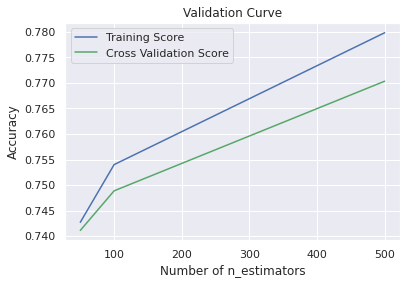

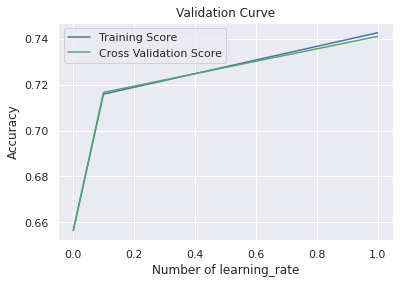

In [ ]:
ada_cv=AdaBoostClassifier()
params={'n_estimators':[50,100,500],'learning_rate':[1e-03,0.001,0.1,1]}
cross_validate_method(params,ada_cv)

In [ ]:
ad=AdaBoostClassifier(learning_rate=1,n_estimators=500)
ad.fit(x_train,y_train)
score_ad=cross_val_score(ad,x_train,y_train,cv=5)

In [ ]:
score_ad.mean()

0.7715747661474858

In [ ]:
y_pred_train_ad=ad.predict(x_train)
y_pred_test_ad=ad.predict(x_test)

In [ ]:
pd.DataFrame(per_metric('Ada Boost',y_train,y_pred_train_ad),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Ada Boost,0.779413,0.790155,0.760901,0.775252,0.779413


In [ ]:
pd.DataFrame(per_metric('Ada Boost',y_test,y_pred_test_ad),index=[0])

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Ada Boost,0.766959,0.777284,0.748342,0.762538,0.766959


We can tune n_estimators using GridSearchCV

### Using GridSearchCV

In [ ]:
ada=AdaBoostClassifier(random_state=42)
params={'n_estimators':[50,100,500,700]}
ada_grid=GridSearchCV(ada,params,cv=5)
ada_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'n_estimators': [50, 100, 500, 700]})

In [ ]:
print(ada_grid.best_params_)

{'n_estimators': 700}


In [ ]:
print(ada_grid.best_score_)

0.7745172694032343


In [ ]:
y_pred_train_ad=ada_grid.predict(x_train)
y_pred_test_ad=ada_grid.predict(x_test)

### Performance

In [ ]:
print(f"Confusion Matrix of Training set is : \n {confusion_matrix(y_train,y_pred_train_ad)}")
print(f"Confusion Matrix of Test set is : \n{confusion_matrix(y_test,y_pred_test_ad)}")

Confusion Matrix of Training set is : 
 [[15017  3674]
 [ 4430 14261]]
Confusion Matrix of Test set is : 
[[3693  980]
 [1150 3523]]


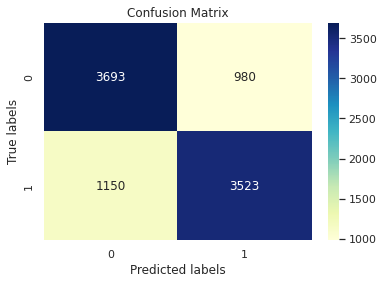

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_test_ad),annot=True,cmap='YlGnBu',fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

#### AUC ROC Curve

Text(0, 0.5, 'True Positive rate')

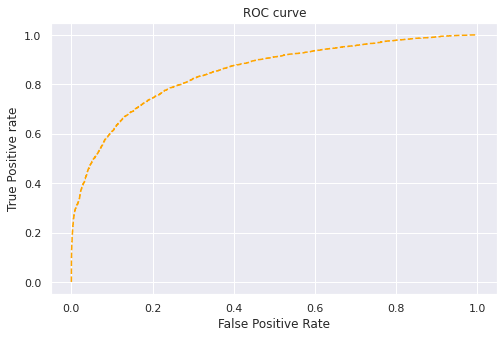

In [ ]:
Y_pred_prob = ada_grid.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, Y_pred_prob[:,1], pos_label=1)
#ROC Curve Plot
plt.figure(figsize=[8,5])
sns.set_style(style='darkgrid')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

#### Performance Metric of Test and Train

In [ ]:
performance_metric=performance_metric.append(pd.DataFrame(per_metric('AdaBoost Clasifier',y_test,y_pred_test_ad),index=[5]))
performance_metric

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.725337,0.735781,0.703189,0.719116,0.725337
1,Random Forest Classifier,0.785149,0.802910,0.755831,0.778660,0.785149
2,XG Boost Classifier,0.799165,0.813172,0.776803,0.794572,0.799165
3,KNN,0.765889,0.743962,0.810828,0.775957,0.765889
4,SVC,0.777017,0.791620,0.751979,0.771291,0.777017
5,AdaBoost Clasifier,0.772095,0.782367,0.753905,0.767873,0.772095


In [ ]:
performance_metric_train=performance_metric_train.append(pd.DataFrame(per_metric('AdaBoost Classifier',y_train,y_pred_train_ad),index=[4]))
performance_metric_train

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
0,Logistic Regression,0.723075,0.733076,0.701621,0.717004,0.723075
1,Random Forest Classifier,0.841394,0.862022,0.812905,0.836743,0.841394
2,XG Boost Classifier,0.825478,0.843371,0.799422,0.820809,0.825478
3,KNN,0.845995,0.821070,0.884811,0.851750,0.845995
4,SVC,0.813386,0.833172,0.783693,0.807675,0.813386
4,AdaBoost Classifier,0.783211,0.795149,0.762988,0.778736,0.783211
